In [1]:
import os.path

import numpy as np
import pandas as pd

In [2]:
classesDict = {
    "T1":0,
    "T1_c":1,
    "T2":2,
    "T2-FLAIR":3,
    "PD":4,
    "SWI":5,
    "GRE":6,
    "T2*":7,
    "DWI":8,
    "ADC":9,
    "BOLD":10,
    "angio":11,
    "PWI":12,
    "ASL":13,
    "DTI":14,
    "Other":15
}

In [3]:
train_labels_path = 'combinedDfs/CombinedTrainingFrame_A2_A3_O3_egd_rss_hb_pruned.txt'
test_labels_path = 'combinedDfs/CombinedTestingFrame_A2_A3_O3_egd_rss_hb_pruned.txt'

In [4]:
train_labels = pd.read_csv(train_labels_path,names=['ID','label','extra'],sep='\t', dtype={'ID':str,'label':int,'extra':int})
test_labels = pd.read_csv(test_labels_path,names=['ID','label','extra'],sep='\t', dtype={'ID':str,'label':int,'extra':int})

In [5]:
Label_name_list = list(classesDict.keys())

In [6]:
Labels = pd.concat((train_labels, test_labels), axis=0)
Labels

,ID,label,extra
0,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,3,0
1,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,7,0
2,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,0,0
3,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,3,0
4,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,15,0
...,...,...,...
63715,/data/scratch/r098375/data/HeartBrain/NIFTI_SL...,12,0
63716,/data/scratch/r098375/data/HeartBrain/NIFTI_SL...,12,0
63717,/data/scratch/r098375/data/HeartBrain/NIFTI_SL...,12,0
63718,/data/scratch/r098375/data/HeartBrain/NIFTI_SL...,12,0


In [7]:
def extractDataset(ID):
    if 'ADNI2' in ID:
        return 'ADNI2'
    elif 'ADNI3' in ID:
        return 'ADNI3'
    elif 'OASIS3' in ID:
        return 'OASIS3'
    elif 'egd' in ID:
        return 'egd'
    elif 'Rstudy' in ID:
        return 'rss'
    elif 'HeartBrain' in ID:
        return 'HeartBrain'
    return None

def assignStringLabel(label, labelList):
    return labelList[label]

In [8]:
FullLabelFrame = Labels.copy()

In [9]:
FullLabelFrame['dataset'] = FullLabelFrame['ID'].apply(extractDataset)
FullLabelFrame['string_label'] = FullLabelFrame['label'].apply(assignStringLabel, labelList=Label_name_list)

In [10]:
FullLabelFrame.groupby('dataset')['string_label'].value_counts()/15

dataset     string_label
ADNI2       PD               225.0
            T2               225.0
ADNI3       Other           5791.0
            T2*             3978.0
            T1              2326.0
            T2-FLAIR        2013.0
            PWI              971.0
            ASL              377.0
            DTI               82.0
            SWI               17.0
            PD                 2.0
HeartBrain  Other           1051.0
            PWI              349.0
            ASL              306.0
            SWI              268.0
            T1               228.0
OASIS3      Other           4944.0
            BOLD            3017.0
            T2              2483.0
            T1              2390.0
            DWI             2009.0
            SWI             1626.0
            T2*             1414.0
            ASL              940.0
            T2-FLAIR         757.0
            angio            557.0
            GRE              437.0
egd         DWI              4

In [11]:
print((FullLabelFrame.groupby('string_label')['dataset'].value_counts()/15).to_latex())

\begin{tabular}{llr}
\toprule
 &  & count \\
string_label & dataset &  \\
\midrule
ADC & egd & 113.000000 \\
\cline{1-3}
\multirow[t]{5}{*}{ASL} & OASIS3 & 940.000000 \\
 & ADNI3 & 377.000000 \\
 & HeartBrain & 306.000000 \\
 & rss & 6.000000 \\
 & egd & 2.000000 \\
\cline{1-3}
\multirow[t]{2}{*}{BOLD} & OASIS3 & 3017.000000 \\
 & rss & 17.000000 \\
\cline{1-3}
\multirow[t]{3}{*}{DTI} & ADNI3 & 82.000000 \\
 & rss & 78.000000 \\
 & egd & 1.000000 \\
\cline{1-3}
\multirow[t]{2}{*}{DWI} & OASIS3 & 2009.000000 \\
 & egd & 453.000000 \\
\cline{1-3}
GRE & OASIS3 & 437.000000 \\
\cline{1-3}
\multirow[t]{5}{*}{Other} & ADNI3 & 5791.000000 \\
 & OASIS3 & 4944.000000 \\
 & HeartBrain & 1051.000000 \\
 & rss & 109.000000 \\
 & egd & 60.000000 \\
\cline{1-3}
\multirow[t]{4}{*}{PD} & ADNI2 & 225.000000 \\
 & rss & 26.000000 \\
 & egd & 3.000000 \\
 & ADNI3 & 2.000000 \\
\cline{1-3}
\multirow[t]{3}{*}{PWI} & ADNI3 & 971.000000 \\
 & HeartBrain & 349.000000 \\
 & egd & 126.000000 \\
\cline{1-3}
\mul

In [28]:
vc = pd.DataFrame(FullLabelFrame.groupby('string_label')['dataset'].value_counts())

In [14]:
first_level_labels = []
second_level_labels = []
first_level_counts = []
second_level_counts = []
for idx in vc.index:
    firstLevel = idx[0]
    secondLevel = idx[1]
    count = vc.loc[idx,'count']
    if firstLevel not in first_level_labels:
        first_level_labels.append(firstLevel)
        second_level_labels.append(secondLevel)
        first_level_counts.append(count)
        second_level_counts.append(count)
    else:
        second_level_counts.append(count)
        second_level_labels.append(secondLevel)
        first_level_counts[-1] += count
unique_second_level = list(set(second_level_labels))

In [15]:
second_level_colors = [unique_second_level.index(x) for x in second_level_labels]

In [16]:
second_level_colors = np.multiply(second_level_colors,int(np.floor(20/max(second_level_colors))))

In [17]:
second_level_colors

array([ 4,  0, 12, 16, 20,  4,  0, 20, 12, 20,  4,  0,  4,  0, 12,  0, 16,
       20,  4,  8, 20,  4, 12, 12, 16,  4,  0, 16, 20, 12,  0, 12,  4, 16,
       20,  4,  0,  4,  8, 12,  0, 12,  0,  0])

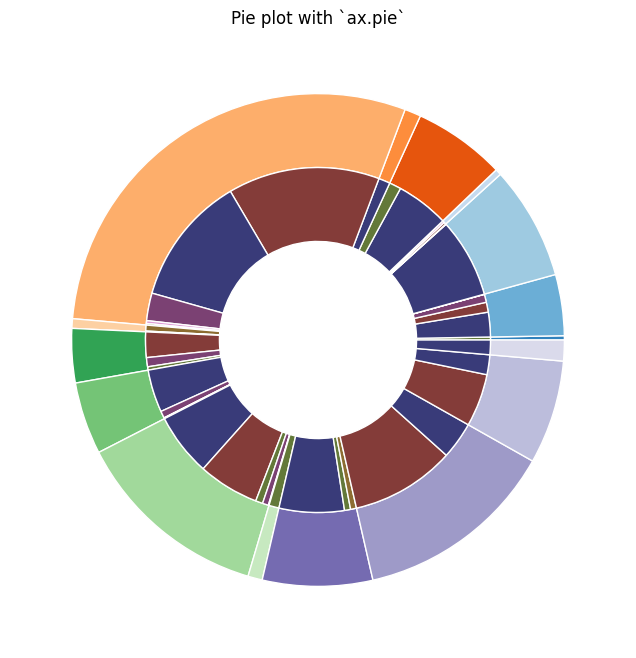

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))

size = 0.3

cmap_outer = plt.colormaps["tab20c"]
cmap_inner = plt.colormaps['tab20b']
outer_colors = cmap_outer(np.arange(len(first_level_labels)))
inner_colors = cmap_inner(second_level_colors)

ax.pie(first_level_counts, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(second_level_counts, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [19]:
labels = FullLabelFrame['string_label'].unique()

In [20]:
datasets = FullLabelFrame[FullLabelFrame['string_label']==labels[0]]['dataset'].unique()

In [21]:
FullLabelFrame['center_slide'] = FullLabelFrame['ID'].apply(lambda x: '__s12' in x)

In [22]:
VisualizeFrame = FullLabelFrame[FullLabelFrame['center_slide']]

In [23]:
# create a frame that contains labels for some visualizations
from sklearn.model_selection import train_test_split
visualize_frame = pd.DataFrame()
for label in labels:
    temp1 = VisualizeFrame[VisualizeFrame['string_label']==label]
    datasets = temp1['dataset'].unique()
    for dataset in datasets:
        df = temp1[temp1['dataset']==dataset]
        try:
            visualize, _ = train_test_split(df, train_size=2, shuffle=True, random_state=42)
        except ValueError:
            visualize = df
        visualize_frame = pd.concat([visualize_frame,visualize], axis=0)

In [24]:
visualize_frame

,ID,label,extra,dataset,string_label,center_slide
170362,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,3,0,ADNI3,T2-FLAIR,True
130877,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,3,0,ADNI3,T2-FLAIR,True
391847,/trinity/home/r098375/DDS/data/OASIS/OASIS3/tr...,3,0,OASIS3,T2-FLAIR,True
259111,/trinity/home/r098375/DDS/data/OASIS/OASIS3/tr...,3,0,OASIS3,T2-FLAIR,True
204631,/trinity/home/r098375/DDS/data/ADNI/ADNI3/trai...,7,0,ADNI3,T2*,True
...,...,...,...,...,...,...
266550,/trinity/home/r098375/DDS/data/OASIS/OASIS3/tr...,11,0,OASIS3,angio,True
505981,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,9,0,egd,ADC,True
58487,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,9,0,egd,ADC,True
56750,/trinity/home/r098375/DDS/data/egd/NIFTI_SLICE...,1,0,egd,T1_c,True


In [25]:
# visualize_frame.to_csv('visualizeFrame.csv', index=False)